In [1]:
from pathlib import Path
from pprint import pprint
import pickle as pkl
from typing import Literal

import matplotlib.pylab as plt
from matplotlib.axes._axes import Axes

from HexLattice import HexCell, HexLattice, Coordinate, AxialCoordinate, DoubleWidthCoordinate, PlotConfig, ValidDirections

## Read data from pkl

In [2]:
result_path =  Path('examples\mega_power_diff.pkl')
with open(result_path, 'rb') as f:
    diff = pkl.load(f)

## Generate Megapower HexLattice

In [3]:
X_MAX = 46
def snake_coord(start: DoubleWidthCoordinate, first_dirction: Literal['bottom-right', 'right']) -> list[AxialCoordinate]:
    res_list = list()
    next_coord = start
    next_dirction: Literal['bottom-right', 'right'] = first_dirction
    
    while(next_coord.x <= X_MAX):
        res_list.append(next_coord)
        
        # get next coord
        last_coord = next_coord
        next_coord = last_coord.get_new_by_moving(next_dirction, 1)
        
        # get next direction
        last_dirction = next_dirction
        next_dirction = 'bottom-right' if last_dirction == 'right' else 'right'
        
        
    
    return res_list

In [4]:
megapower_list = list()
bottom_right = [DoubleWidthCoordinate(0, 2), DoubleWidthCoordinate(0, 0), DoubleWidthCoordinate(0, -2)]
right = [DoubleWidthCoordinate(1+3*i, -3-i)  for i in range(16)]

for br in bottom_right:
    megapower_list.extend(snake_coord(br, 'bottom-right'))
for r in right:
    megapower_list.extend(snake_coord(r, 'right'))

In [5]:
hl = HexLattice([HexCell(c) for c in megapower_list])
for hex_cell in hl.HexCells:
    hex_cell.text = f'({hex_cell.double_width.x},{hex_cell.double_width.z})'

## Write data into HexCells

In [6]:
hl_pod = HexLattice(sorted(hl.HexCells, key=lambda x: (x.double_width.x, x.double_width.z)), pitch=1.6)
for i, hex_cell in enumerate(hl_pod.HexCells):
    hex_cell.value = diff['pod'][i] * 100

In [7]:
hl_lin = HexLattice(sorted(hl.HexCells, key=lambda x: (x.double_width.x, x.double_width.z)), pitch=1.6)
for i, hex_cell in enumerate(hl_lin.HexCells):
    hex_cell.value = diff['lin'][i] * 100

## Plot

In [8]:
pc = PlotConfig('Relative Error of POD-RBF Power Prediction')
pc.image_root_dir = Path('examples/plot')
pc.text_size = 7
pc.image_type = 'png'
pc.plot_style = 'bmh'

C:\Users\61012\AppData\Local\Temp\ipykernel_43624\3417121981.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels([f'{t}\%' for t in c_ticks])


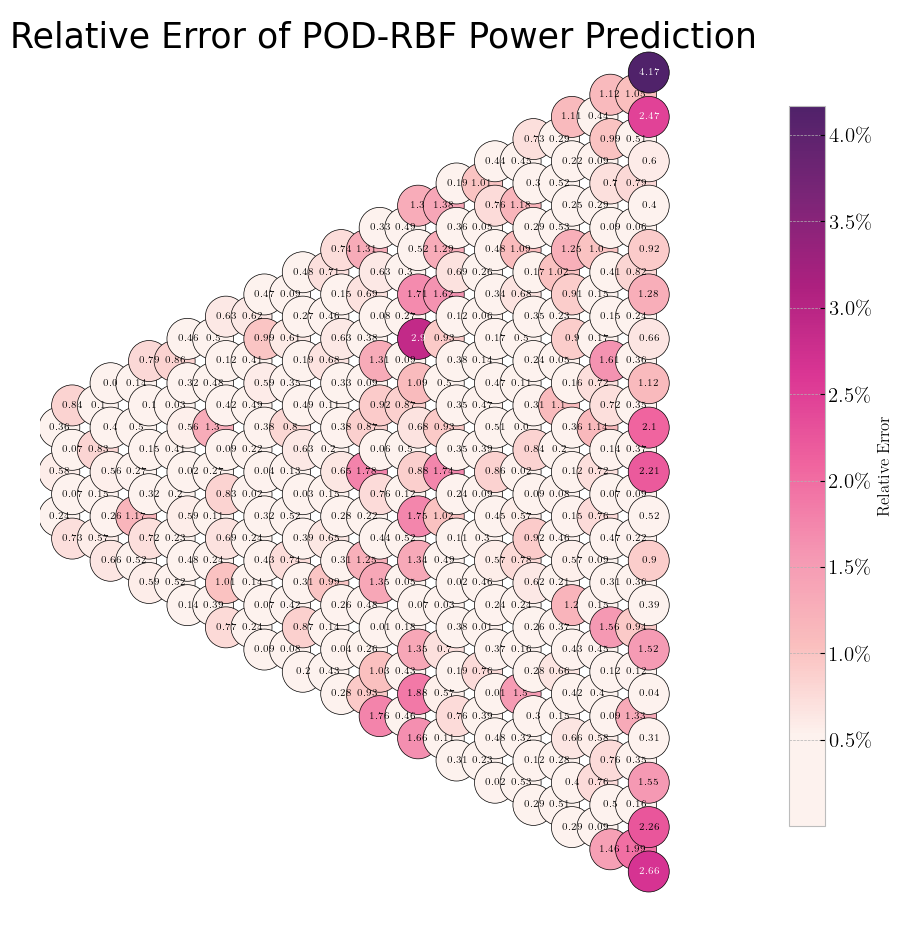

In [9]:
fig = plt.figure(figsize=(12, 12))
axes: Axes = fig.subplots()
hl_pod.plot_circle(pc, axes, 'value')

cb_ax = fig.add_axes([0.85, 0.2, 0.03, 0.6])
cbar = fig.colorbar(hl_pod.mappable(pc), cb_ax)
cbar.ax.tick_params(labelsize=15)
cbar.set_label('Relative Error')
c_ticks = cbar.get_ticks()
cbar.set_ticklabels([f'{t}\%' for t in c_ticks])

plt.savefig(pc.image_path)
plt.show()
plt.close()

In [10]:
pc = PlotConfig('Relative Error of Linear Interpolation Power Prediction')
pc.image_root_dir = Path('examples/plot')
pc.text_size = 7
pc.image_type = 'png'
pc.plot_style = 'bmh'

In [11]:
fig = plt.figure(figsize=(12, 12))
axes: Axes = fig.subplots()
hl_lin.plot_circle(pc, axes, 'value')

cb_ax = fig.add_axes([0.85, 0.2, 0.03, 0.6])
cbar = fig.colorbar(hl_lin.mappable(pc), cb_ax)
cbar.ax.tick_params(labelsize=15)
cbar.set_label('Relative Error')
c_ticks = cbar.get_ticks()
cbar.set_ticklabels([f'{t}\%' for t in c_ticks])

plt.savefig(pc.image_path)
plt.show()
plt.close()

C:\Users\61012\AppData\Local\Temp\ipykernel_43624\162245945.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels([f'{t}\%' for t in c_ticks])
